### Import Required Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Load and Explore the Dataset

In [73]:
df = pd.read_csv("Housing.csv")

In [74]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [75]:
df.shape

(545, 13)

In [76]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [78]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [79]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

###  Preprocess the Dataset

In [54]:
# Binary columns with 'yes'/'no' → convert to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Categorical column with multiple categories → One-Hot Encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [81]:
print(df.dtypes)

price                     int64
area                      int64
bedrooms                  int64
bathrooms                 int64
stories                   int64
mainroad                  int64
guestroom                 int64
basement                  int64
hotwaterheating           int64
airconditioning           int64
parking                   int64
prefarea                  int64
furnish_semi-furnished     bool
furnish_unfurnished        bool
dtype: object


### Feature Selection and Target Separation

In [82]:
#  Split features and target
X = df.drop('price', axis=1)
y = df['price']

### Split the Data into Train and Test Sets

In [83]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Linear Regression Model

In [84]:
# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

###  Predict on Test Data

In [85]:
# Predictions and Evaluation
y_pred = lr.predict(X_test)

### Evaluate the Model

In [86]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R² Score: 0.65


###  Visualize Predictions vs Actuals

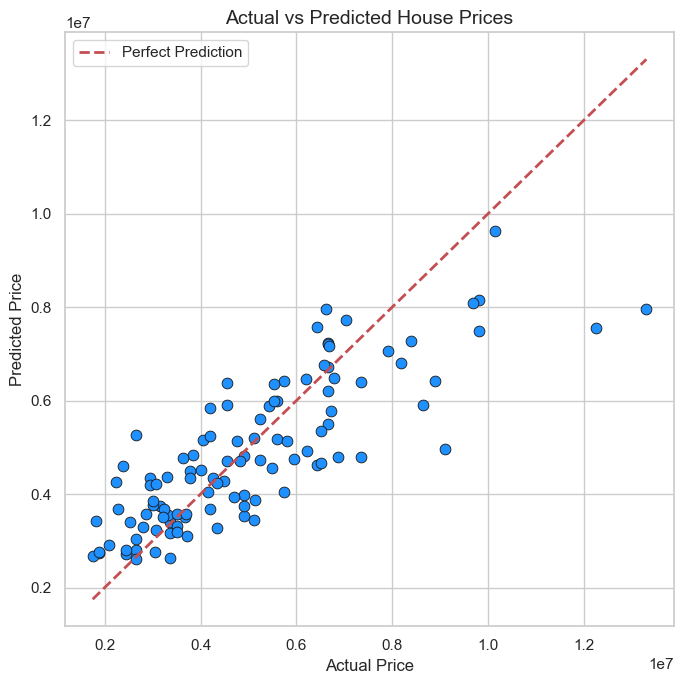

In [94]:
# Create the plot
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', s=60, edgecolor='k')

# Plot the ideal prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### Interpret Model Coefficients

In [100]:
# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

# Display the result
print("Linear Regression Coefficients:\n")
print(coeff_df.to_string(index=False))


Linear Regression Coefficients:

               Feature   Coefficient
                  area  2.359688e+02
              bedrooms  7.677870e+04
             bathrooms  1.094445e+06
               stories  4.074766e+05
              mainroad  3.679199e+05
             guestroom  2.316100e+05
              basement  3.902512e+05
       hotwaterheating  6.846499e+05
       airconditioning  7.914267e+05
               parking  2.248419e+05
              prefarea  6.298906e+05
furnish_semi-furnished -1.268818e+05
   furnish_unfurnished -4.136451e+05
